In [1]:
import os
from pandas import concat, Series, DataFrame

from project.model import get_config, config2inputs, initialize
from project.utils import make_plot, make_grouped_subplots

In [2]:
path = 'output/static'
if not os.path.isdir(path):
    os.mkdir(path)

### Loading inputs
Here we are loagin inputs

In [3]:
config = get_config()
inputs, stock, year, policies_heater, policies_insulation, taxes = config2inputs(config)

In [4]:
buildings, energy_prices, taxes, post_inputs, cost_heater, ms_heater, cost_insulation, ms_intensive, renovation_rate_ini, policies_heater, policies_insulation, flow_built = initialize(inputs, stock, year, policies_heater, policies_insulation, taxes, config, path)

2022-09-16 11:15:42,696 - 10027 - log_static - INFO - Creating AgentBuildings object


### Analysis

We are goign to create MAC curve

In [55]:
consumption_before, potential_consumption_saved, potential_cost_insulation = buildings.mitigation_potential(energy_prices, cost_insulation)

Function prepare_consumption took 0.0914 seconds
Function prepare_cost_insulation took 0.0103 seconds


In [56]:
cost_insulation_segment = (potential_cost_insulation.T / buildings.stock).T
consumption_saved_segment = (potential_consumption_saved.T / buildings.stock).T

In [57]:
output = {'Consumption initial (TWh)': consumption_before.sum() / 10 ** 9,
          'Potential consumption saved (TWh)': potential_consumption_saved.sum() / 10 ** 9,
          'Potential consumption saved (%)': potential_consumption_saved.sum() / consumption_before.sum(),
          'Cost (Billion euro)': potential_cost_insulation.sum() / 10**9,
          'Efficiency insulation (euro/kWh)': potential_cost_insulation.sum() / potential_consumption_saved.sum()
          }

In [58]:
DataFrame(output)

Consumption initial (TWh)  \
Wall  Floor Roof  Windows                              
False False False True                    338.044052   
            True  False                   338.044052   
                  True                    338.044052   
      True  False False                   338.044052   
                  True                    338.044052   
            True  False                   338.044052   
                  True                    338.044052   
True  False False False                   338.044052   
                  True                    338.044052   
            True  False                   338.044052   
                  True                    338.044052   
      True  False False                   338.044052   
                  True                    338.044052   
            True  False                   338.044052   
                  True                    338.044052   

                           Potential consumption saved (TWh)  \
Wall  Floor Roof  Windows                                      
False False False True                             56.046343   
            True  False                            37.034930   
                  True                             93.550650   
      True  False False                            29.060285   
                  True                             85.564664   
            True  False                            66.621357   
                  True                            123.709507   
True  False False False                           100.222353   
                  True                            158.296835   
            True  False                           138.250994   
                  True                            196.961998   
      True  False False                           129.913259   
                  True                            188.599570   
            True  False                           168.613884   
                  True                            228.094174   

                           Potential consumption saved (%)  \
Wall  Floor Roof  Windows                                    
False False False True                            0.165796   
            True  False                           0.109557   
                  True                            0.276741   
      True  False False                           0.085966   
                  True                            0.253117   
            True  False                           0.197079   
                  True                            0.365957   
True  False False False                           0.296477   
                  True                            0.468273   
            True  False                           0.408973   
                  True                            0.582652   
      True  False False                           0.384309   
                  True                            0.557914   
            True  False                           0.498793   
                  True                            0.674747   

                           Cost (Billion euro)  \
Wall  Floor Roof  Windows                        
False False False True              150.139428   
            True  False             103.758257   
                  True              253.897684   
      True  False False              62.114318   
                  True              212.253746   
            True  False             165.872575   
                  True              316.012002   
True  False False False             343.435781   
                  True              493.575209   
            True  False             447.194038   
                  True              597.333466   
      True  False False             405.550099   
                  True              555.689527   
            True  False             509.308356   
                  True              659.447784   

                           Efficiency insulation (euro/kWh)  
Wall  Floor Roof 

In [59]:
def mac_curve(x, y):
    """Marginal abatement cost curve.

    Parameters
    ----------
    x: Series
    y: Series

    Returns
    -------

    """
    df = concat((x, y), axis=1)
    df.sort_values(y.name, inplace=True)
    df['{} cumulated'.format(x.name)] = df[x.name].cumsum()
    df = df.set_index('{} cumulated'.format(x.name))[y.name]
    make_plot(df, y_label=y.name, legend=False)


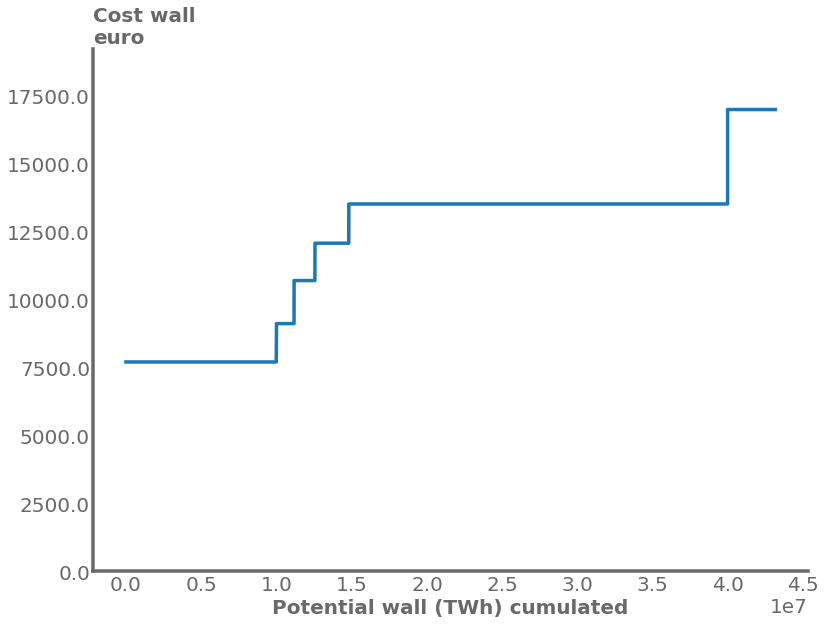

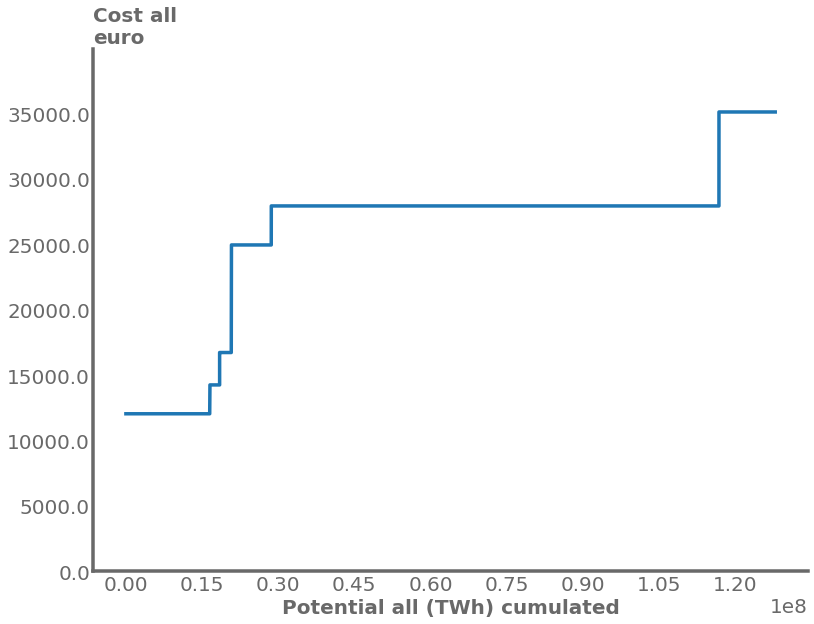

In [60]:
for key, item in {'Wall': (True, False, False, False), 'All': (True, True, True, True)}.items():
    x = consumption_saved_segment.loc[:, item].rename('Potential {} (TWh)'.format(key.lower()))
    y = cost_insulation_segment.loc[:, item].rename('Cost {} (euro)'.format(key.lower()))
    mac_curve(x, y)